#Better learning curve

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import sklearn.calibration
import numpy as np
import pickle

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr3, Xte3, ytr3, yte3 = get_training_test_set(rawtable, make_features=make_features5, 
                                               categorize_rating=categorize_rating5)

In [4]:
clf = pickle.load(open('../pipe2.pkl', 'rb'))

In [5]:
clf_dummy = get_dummy_clf()

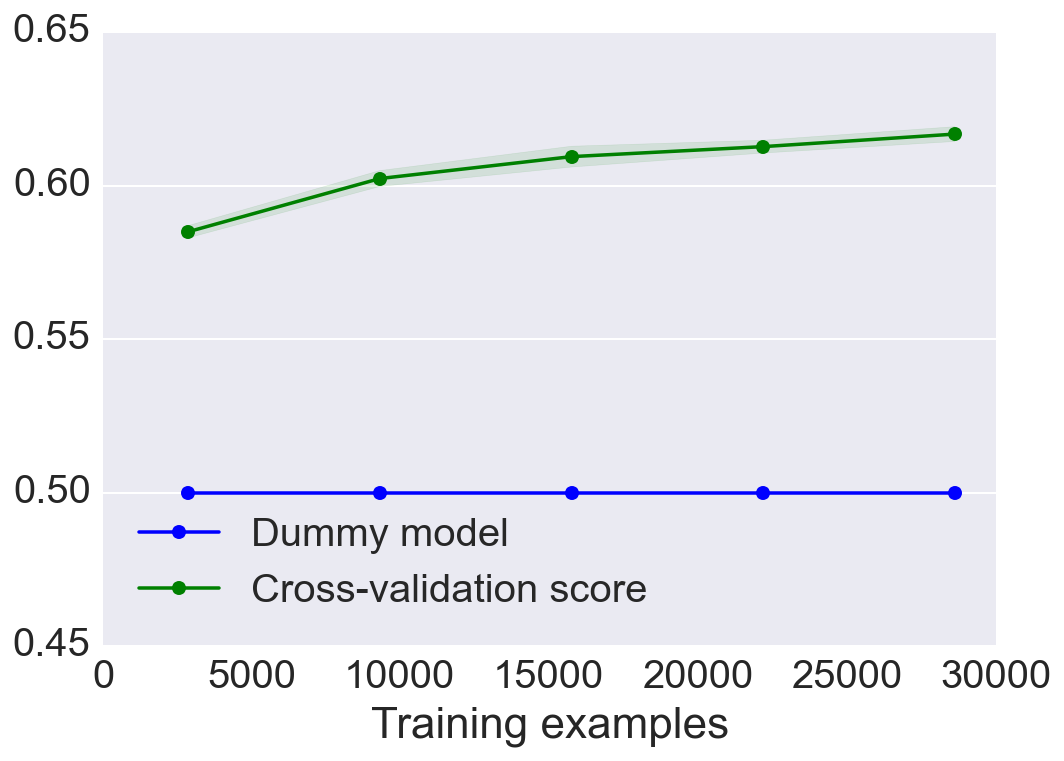

In [6]:
sns.set_context('notebook', 2.0)
plot_learning_curve(clf, "", Xtr3, ytr3, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.45, 0.65], n_jobs=1, plot_train=False)
plt.ylabel('')